<a href="https://colab.research.google.com/github/relew/matchPrediction/blob/master/MatchPrediction_detailed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
url = 'http://dataevents.hu/202303/filedataevents/competition_table.xlsx'

In [ ]:
data = pd.read_excel(url)

In [ ]:
data.columns = data.columns.str.replace("yelllow", "yellow")

In [ ]:
data.head()

,match_id,season,div,odds_home_team_win,odds_draw,odds_away_team_win,home_team_match_nr,home_team_goal_roll1_sum,home_team_goal_roll2_sum,home_team_goal_roll3_sum,...,odds_away_team_draw_roll4_mean,odds_away_team_defeat_roll1_mean,odds_away_team_defeat_roll2_mean,odds_away_team_defeat_roll3_mean,odds_away_team_defeat_roll4_mean,away_team_point_mean,away_team_expected_point_mean,home_win_flag,draw_flag,away_win_flag
0,0,2008-2009,div0,1.73,3.5,5.00,5,3,7,8,...,3.825,11.00,7.665,6.377,5.908,0.500,3.0,0,0,1
1,1,2008-2009,div0,1.25,5.5,12.00,7,0,2,5,...,3.582,2.10,2.250,2.833,2.475,0.333,0.0,0,1,0
2,2,2008-2009,div0,1.57,3.8,5.75,9,1,4,4,...,3.525,6.75,4.275,3.883,3.638,0.750,1.5,1,0,0
3,3,2008-2009,div0,1.17,7.0,15.00,11,2,6,7,...,3.975,4.20,2.750,2.333,2.550,0.600,0.0,1,0,0
4,4,2008-2009,div0,1.17,7.0,15.00,14,2,4,7,...,3.925,3.10,2.175,2.050,2.015,0.833,0.0,1,0,0


In [ ]:
data.shape

(64166, 167)

In [ ]:
data.groupby("div").home_team_match_nr.describe()

,count,mean,std,min,25%,50%,75%,max
div,,,,,,,,
div0,3779.0,19.503308,8.655067,5.0,12.0,20.0,27.0,34.0
div1,4753.0,21.526404,9.800675,5.0,13.0,22.0,30.0,38.0
div10,1348.0,19.520030,8.645817,5.0,12.0,20.0,27.0,34.0
div11,1723.0,21.758561,9.997838,5.0,13.0,22.0,30.0,42.0
div12,1270.0,18.934646,8.438512,5.0,12.0,19.0,26.0,34.0
div13,1349.0,19.509266,8.653190,5.0,12.0,20.0,27.0,34.0
div14,710.0,19.100000,8.718275,5.0,12.0,19.0,26.0,36.0
div15,686.0,18.874636,8.810016,5.0,11.0,18.0,26.0,36.0
div16,681.0,18.885463,8.798652,5.0,11.0,18.0,26.0,36.0


In [ ]:
all_cols = []
for item in data.columns:
  if "_roll" in item:
    value = item.split("_roll")[0]
    if value not in all_cols:
      all_cols.append(value)

In [ ]:
def col_creator(data):
  used = []
  for item in data.columns:
    if "sum" in item:
      val = item.split("_roll")[0]
      if (val not in used) & ("sum" in item):
        used.append(val)
        color1 = val+"_roll1_sum"
        color2 = val+"_roll2_sum"
        color3 = val+"_roll3_sum"
        color4 = val+"_roll4_sum"
        sec = "second_match_"+val
        third = "third_match_"+val
        four = "forth_match_"+val
        data[sec] = data[color2] - data[color1] 
        data[third] = data[color3] - data[color1] - data[sec]
        data[four] = data[color4] - data[color1] - data[sec] - data[third]
      elif (val not in used) & ("mean" in item):
        color1 = val+"_roll1_mean"
        color2 = val+"_roll2_mean"
        color3 = val+"_roll3_mean"
        color4 = val+"_roll4_mean"
        sec = "second_match_"+val
        third = "third_match_"+val
        four = "forth_match_"+val
        data[sec] = data[color2] * 2 - data[color1] 
        data[third] = data[color3] * 3 - data[color1] - data[sec]
        data[four] = data[color4] * 4 - data[color1] - data[sec] - data[third]
  return data

In [ ]:
data = col_creator(data)

In [ ]:
for item in data.columns:
  if data.columns.isnull().sum() != 0:
    print(item)

In [ ]:
data["odds_diff"] = data["odds_home_team_win"] - data["odds_away_team_win"]
data["odds_diff"] = np.where(data["odds_diff"] > 10, 10, data["odds_diff"])
data["odds_diff"] = np.where(data["odds_diff"] < -10, -10, data["odds_diff"])

In [ ]:
#?????
#data["roundest"] = np.where(data["home_team_match_nr"] < data["away_team_match_nr"],data["home_team_match_nr"],np.where(data["home_team_match_nr"] > data["away_team_match_nr"], data["away_team_match_nr"],data["home_team_match_nr"]))
#data["home_pos"] = data["home_team_point_mean"] * data["roundest"]
#data["away_pos"] = data["away_team_point_mean"] * data["roundest"]

In [ ]:
# Seeing where team is located on table based on str....3 mean top team, 2 middle, 1 relegation pos....change this to based on avg points scored
data["home_team_pos_str"] = np.where(data["home_team_point_mean"] > 1.8, 3, np.where(data["home_team_point_mean"] < 1.2, 1, 2))
data["away_team_pos_str"] = np.where(data["home_team_point_mean"] > 1.8, 3, np.where(data["home_team_point_mean"] < 1.2, 1, 2))

<ipython-input-185-509f8f520ab0>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data["home_team_pos_str"] = np.where(data["home_team_point_mean"] > 1.8, 3, np.where(data["home_team_point_mean"] < 1.2, 1, 2))
<ipython-input-185-509f8f520ab0>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data["away_team_pos_str"] = np.where(data["home_team_point_mean"] > 1.8, 3, np.where(data["home_team_point_mean"] < 1.2, 1, 2))


In [ ]:
sum_cols = []
for item in data.columns:
  if "sum" in item:
    value = item.split("_roll")[0]
    if value not in sum_cols:
      sum_cols.append(value)

In [ ]:
sum_cols

['home_team_goal',
 'home_team_opponents_goal',
 'home_team_shot',
 'home_team_opponents_shot',
 'home_team_shot_on_target',
 'home_team_opponents_shot_on_target',
 'home_team_fault',
 'home_team_opponents_fault',
 'home_team_corner',
 'home_team_opponents_corner',
 'home_team_yellow_card',
 'home_team_opponents_yellow_card',
 'home_team_red_card',
 'home_team_opponents_red_card',
 'home_team_point',
 'home_team_expected_point',
 'away_team_goal',
 'away_team_opponents_goal',
 'away_team_shot',
 'away_team_opponents_shot',
 'away_team_shot_on_target',
 'away_team_opponents_shot_on_target',
 'away_team_fault',
 'away_team_opponents_fault',
 'away_team_corner',
 'away_team_opponents_corner',
 'away_team_yellow_card',
 'away_team_opponents_yellow_card',
 'away_team_red_card',
 'away_team_opponents_red_card',
 'away_team_point',
 'away_team_expected_point']

In [ ]:
def medianer(X):
  for item in sum_cols:
    colname = item+"_median"
    val1 = item+"_roll1_sum"
    val2 = "second_match_"+item
    val3 ="third_match_"+item
    val4 ="forth_match_"+item
    X[colname] = np.sort(X, axis=1)[:, 1:3].sum(1)/2
  return X

In [ ]:
for item in sum_cols:
  colname = item+"_median"
  columns = [c for c in data.columns if item in c]
  data[colname] = data[columns].apply(lambda x: sorted(x)[1:3], axis=1, result_type='expand').sum(1)/2


In [ ]:
def wincounter(data):
  if data["home_team_goal_roll1_sum"] > data["home_team_opponents_goal_roll1_sum"]:
    if data["second_match_home_team_goal"] > data["second_match_home_team_opponents_goal"]:
      if data["third_match_home_team_goal"] > data["third_match_home_team_opponents_goal"]:
        if data["forth_match_home_team_goal"] > data["forth_match_home_team_opponents_goal"]:
          return 4
        else: 
          return 3
      else:
        return 2
    else:
      return 1
  else:
    return 0

def aw_wincounter(data):
  if data["away_team_goal_roll1_sum"] > data["away_team_opponents_goal_roll1_sum"]:
    if data["second_match_away_team_goal"] > data["second_match_away_team_opponents_goal"]:
      if data["third_match_away_team_goal"] > data["third_match_away_team_opponents_goal"]:
        if data["forth_match_away_team_goal"] > data["forth_match_away_team_opponents_goal"]:
          return 4
        else: 
          return 3
      else:
        return 2
    else:
      return 1
  else:
    return 0

In [ ]:
data["home_win_streak"] = data.apply(lambda x: wincounter(x), axis = 1)

In [ ]:
data["away_win_streak"] = data.apply(lambda x: aw_wincounter(x), axis = 1)

In [ ]:
data["home_win_streak"].value_counts()

0    43376
1    11991
2     4968
4     1943
3     1888
Name: home_win_streak, dtype: int64

In [ ]:
data["away_win_streak"].value_counts()

0    37675
1    16584
2     5415
3     2342
4     2150
Name: away_win_streak, dtype: int64

In [ ]:
clean_cols = []
for item in sum_cols:
  val = item.split("_team_")[1]
  if ("opponents_" not in val) & (val not in clean_cols):
    clean_cols.append(val)

In [ ]:
clean_cols

['goal',
 'shot',
 'shot_on_target',
 'fault',
 'corner',
 'yellow_card',
 'red_card',
 'point',
 'expected_point']

In [ ]:
def ratio(data):
  for item in clean_cols:
    home_val = "home_team_" + item + "_median"
    away_val = "away_team_" + item + "_median"
    rat = item+"_ratio"
    data[rat] = data[home_val] / data[away_val]
  return data

def pre_match_ratio(data):
  for item in clean_cols[:-2]:
    home_val = "home_team_" + item + "_median"
    home_opp_val = "home_team_opponents_" + item + "_median"
    rat = item+"home_ratio"
    data[rat] = data[home_val] / data[home_opp_val]
    away_val = "away_team_" + item + "_median"
    away_opp_val = "away_team_opponents_" + item + "_median"
    rat_aw = item+"away_ratio"
    data[rat_aw] = data[away_val] / data[away_opp_val]
  return data




In [ ]:
data = pre_match_ratio(data)

In [ ]:
cols_use = []

for item in data.columns:
  if ("ratio" in item) & ("opponents" not in item):
    cols_use.append(item)
  elif ("median" in item) & ("opponents" not in item):
    cols_use.append(item)

In [ ]:
cols_use

['home_team_goal_median',
 'home_team_shot_median',
 'home_team_shot_on_target_median',
 'home_team_fault_median',
 'home_team_corner_median',
 'home_team_yellow_card_median',
 'home_team_red_card_median',
 'home_team_point_median',
 'home_team_expected_point_median',
 'away_team_goal_median',
 'away_team_shot_median',
 'away_team_shot_on_target_median',
 'away_team_fault_median',
 'away_team_corner_median',
 'away_team_yellow_card_median',
 'away_team_red_card_median',
 'away_team_point_median',
 'away_team_expected_point_median',
 'goalhome_ratio',
 'goalaway_ratio',
 'shothome_ratio',
 'shotaway_ratio',
 'shot_on_targethome_ratio',
 'shot_on_targetaway_ratio',
 'faulthome_ratio',
 'faultaway_ratio',
 'cornerhome_ratio',
 'corneraway_ratio',
 'yellow_cardhome_ratio',
 'yellow_cardaway_ratio',
 'red_cardhome_ratio',
 'red_cardaway_ratio']

In [ ]:
data["Pos_diff"] = data["home_team_pos_str"] - data["away_team_pos_str"]

In [ ]:
data = data[["Pos_diff",'odds_diff','home_team_pos_str', 'away_team_pos_str', 'home_team_goal_median',
       'home_team_opponents_goal_median', 'home_team_shot_median', 'home_team_shot_on_target_median',
 'home_team_fault_median','home_team_corner_median','home_team_yellow_card_median','home_team_red_card_median','away_team_goal_median',
 'away_team_shot_median','away_team_shot_on_target_median','away_team_fault_median','away_team_corner_median','away_team_yellow_card_median','away_team_red_card_median',
 'shothome_ratio',
 'shotaway_ratio',
 'shot_on_targethome_ratio',
 'shot_on_targetaway_ratio','faulthome_ratio','faultaway_ratio','cornerhome_ratio','corneraway_ratio','yellow_cardhome_ratio','yellow_cardaway_ratio','red_cardhome_ratio','red_cardaway_ratio', "home_win_flag"]]

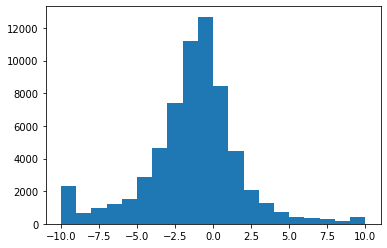

In [ ]:
from pandas.core.describe import DataFrameDescriber
plt.hist(data["odds_diff"], bins = 20)
plt.show()

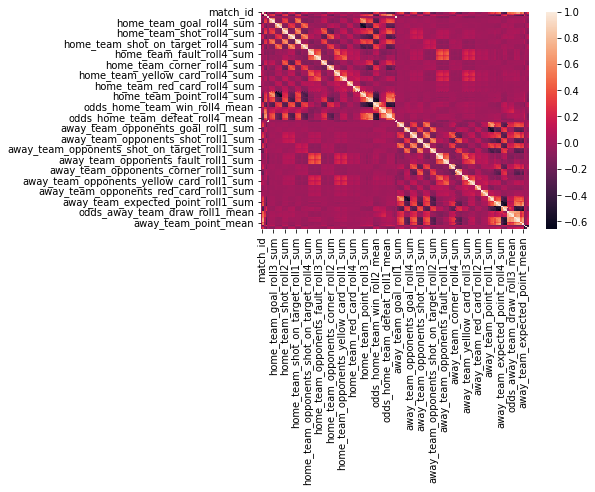

In [ ]:
sns.heatmap(data.corr())

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
MM = MinMaxScaler()
SS = StandardScaler()

In [ ]:
data.columns

Index(['Pos_diff', 'odds_diff', 'home_team_pos_str', 'away_team_pos_str',
       'home_team_goal_median', 'home_team_opponents_goal_median',
       'home_team_shot_median', 'home_team_shot_on_target_median',
       'home_team_fault_median', 'home_team_corner_median',
       'home_team_yellow_card_median', 'home_team_red_card_median',
       'away_team_goal_median', 'away_team_shot_median',
       'away_team_shot_on_target_median', 'away_team_fault_median',
       'away_team_corner_median', 'away_team_yellow_card_median',
       'away_team_red_card_median', 'shothome_ratio', 'shotaway_ratio',
       'shot_on_targethome_ratio', 'shot_on_targetaway_ratio',
       'faulthome_ratio', 'faultaway_ratio', 'cornerhome_ratio',
       'corneraway_ratio', 'yellow_cardhome_ratio', 'yellow_cardaway_ratio',
       'red_cardhome_ratio', 'red_cardaway_ratio', 'home_win_flag'],
      dtype='object')

In [ ]:
data = data.drop("odds_diff", axis = 1)

In [ ]:
y = data.iloc[:, -1].values
X = data.iloc[:, :-1].values

In [ ]:
X_mod = np.nan_to_num(X)

In [ ]:
X_scaled = MM.fit_transform(X_mod)

In [ ]:
model.fit(X_scaled,y)

DecisionTreeClassifier()

In [ ]:
cols = data.columns

In [ ]:
importance = model.feature_importances_

Feature: Pos_diff Score: 0.0
Feature: home_team_pos_str Score: 0.020996541231226084
Feature: away_team_pos_str Score: 0.0021490810190429874
Feature: home_team_goal_median Score: 0.0421962215221868
Feature: home_team_opponents_goal_median Score: 0.047147495314760215
Feature: home_team_shot_median Score: 0.040732735670000075
Feature: home_team_shot_on_target_median Score: 0.03815478977345581
Feature: home_team_fault_median Score: 0.09026992392202877
Feature: home_team_corner_median Score: 0.06565312172737599
Feature: home_team_yellow_card_median Score: 0.053378304390937104
Feature: home_team_red_card_median Score: 0.004709066369240641
Feature: away_team_goal_median Score: 0.0424262202884853
Feature: away_team_shot_median Score: 0.03835786941934878
Feature: away_team_shot_on_target_median Score: 0.03782512341207911
Feature: away_team_fault_median Score: 0.08124681260053601
Feature: away_team_corner_median Score: 0.06852392015051305
Feature: away_team_yellow_card_median Score: 0.0526588547

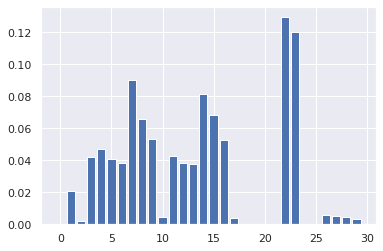

In [ ]:
for i,v in enumerate(importance):
 print(f'Feature: {cols[i]} Score: {v}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
pca = PCA(n_components=10) # estimate only 2 PCs
X_new = pca.fit_transform(X_scaled) # project the original data into the PCA space

In [ ]:
print(pca.explained_variance_ratio_)

[0.44108152 0.07220956 0.06687831 0.0570114  0.05294047 0.05008693
 0.04579203 0.03687675 0.02773294 0.02355794]


In [ ]:
data_y1= data[data['home_win_flag']==1].reset_index(drop=True)
data_y0= data[data['home_win_flag']==0].reset_index(drop=True)

In [ ]:
### home win col 164
data_to_train = pd.concat([data_y1[0:20000],data_y0[0:20000]], ignore_index=True)
y_train = data_to_train.iloc[:, -1].values
X_train = data_to_train.drop(["home_win_flag"], axis = 1).values


In [ ]:
data_to_test = pd.concat([data_y1[20000:28000],data_y0[20000:28000]], ignore_index=True)
y_test = data_to_test.iloc[:, -1].values
X_test = data_to_test.drop(["home_win_flag"], axis = 1).values

In [ ]:
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)
X_test = MM.fit_transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
clf = RandomForestClassifier(max_depth=10, random_state=0)
X_train = MM.fit_transform(X_train)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [ ]:
preds = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import sklearn

In [ ]:
sklearn.metrics.confusion_matrix(y_test, preds)

array([[4809, 3191],
       [3523, 4477]])

In [ ]:
print (clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.666325
0.580375


In [ ]:
importance = clf.feature_importances_

Feature: Pos_diff Score: 0.0
Feature: home_team_pos_str Score: 0.059119730483651774
Feature: away_team_pos_str Score: 0.0744122106275897
Feature: home_team_goal_median Score: 0.05855833557496313
Feature: home_team_opponents_goal_median Score: 0.03613301794621657
Feature: home_team_shot_median Score: 0.053648775240348924
Feature: home_team_shot_on_target_median Score: 0.049118134188637225
Feature: home_team_fault_median Score: 0.05260839603885659
Feature: home_team_corner_median Score: 0.0545867591797907
Feature: home_team_yellow_card_median Score: 0.03525005936005847
Feature: home_team_red_card_median Score: 0.00486076716825897
Feature: away_team_goal_median Score: 0.04346707983875629
Feature: away_team_shot_median Score: 0.07756859070810257
Feature: away_team_shot_on_target_median Score: 0.07890077980387625
Feature: away_team_fault_median Score: 0.05345208137389894
Feature: away_team_corner_median Score: 0.06460274313718505
Feature: away_team_yellow_card_median Score: 0.04248554781458

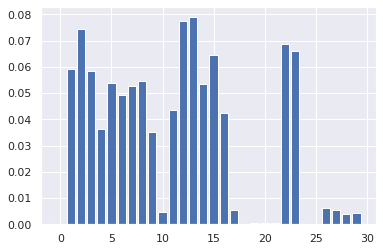

In [ ]:
for i,v in enumerate(importance):
 print(f'Feature: {cols[i]} Score: {v}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
len(data.columns)

31

In [ ]:
model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=30))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               3968      
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=100)

Epoch 1/100
400/400 [==============================] - 48s 4ms/step - loss: 0.6724 - accuracy: 0.5791 - val_loss: 0.6665 - val_accuracy: 0.5837
Epoch 2/100
400/400 [==============================] - 2s 4ms/step - loss: 0.6686 - accuracy: 0.5832 - val_loss: 0.6675 - val_accuracy: 0.5828
Epoch 3/100
400/400 [==============================] - 2s 6ms/step - loss: 0.6678 - accuracy: 0.5859 - val_loss: 0.6673 - val_accuracy: 0.5831
Epoch 4/100
400/400 [==============================] - 1s 3ms/step - loss: 0.6677 - accuracy: 0.5875 - val_loss: 0.6680 - val_accuracy: 0.5821
Epoch 5/100
400/400 [==============================] - 1s 3ms/step - loss: 0.6674 - accuracy: 0.5869 - val_loss: 0.6686 - val_accuracy: 0.5805
Epoch 6/100
400/400 [==============================] - 1s 3ms/step - loss: 0.6670 - accuracy: 0.5861 - val_loss: 0.6705 - val_accuracy: 0.5812
Epoch 7/100
400/400 [==============================] - 1s 3ms/step - loss: 0.6673 - accuracy: 0.5875 - val_loss: 0.6686 - val_accuracy: 0.581

[]

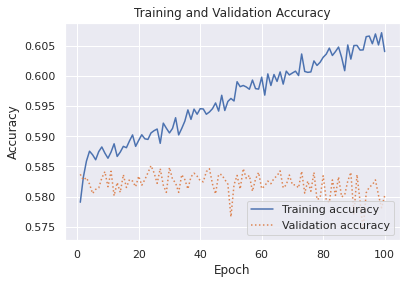

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

500/500 [==============================] - 1s 2ms/step


Text(89.18, 0.5, 'Actual')

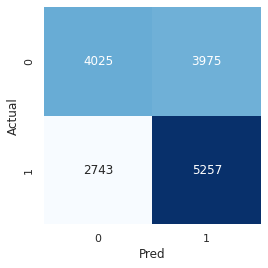

In [ ]:
y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['0', '1']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Pred')
plt.ylabel('Actual')